In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [426]:
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.manifold import TSNE

In [28]:
data = pd.read_csv('final_dataset.csv')

In [29]:
len(data.columns)

20

In [30]:
data.head()

,Unnamed: 0,URL,embedded_domain_in_path,ip_address,number_of_dots,host_has_dash,dictionary_word,http_in_hostname,targeted_brand,redirecting url,ext url,Phishing,Subdomains,Prefix-Suffix,Anchor Tag,Tags,Forms,SSL Expiry Date,SSL Cert Check,Alexa Ranking
0,0,https://locking-app-adverds.000webhostapp.com/...,1,-1,-1,1,1,-1,-1,-1,-1,yes,3,-1,N-N,N-N,N-N,253,0,3664.0
1,1,https://mxtoolbox.com/public/upgradev2.aspx?ps...,0,-1,-1,-1,-1,-1,-1,-1,-1,no,2,1,155.3191489,100,0,256,0,6619.0
2,2,http://parolishop.com.br/questionreviews.htm,0,-1,-1,-1,-1,-1,-1,-1,-1,yes,3,1,293.4911243,100,0,36,0,NaN
3,3,http://innovate.ieee.org/innovate/35675?lt=xpl...,1,-1,-1,-1,-1,-1,-1,-1,-1,no,3,1,N-N,N-N,N-N,58,0,717.0
4,4,http://ietbhaddal.edu.in/bb.mobile/mobile/inde...,0,-1,-1,-1,-1,-1,1,-1,-1,yes,3,1,N-N,N-N,N-N,716,1,NaN


# DATA CLEANING

In [31]:
data.drop('Unnamed: 0', axis=1,inplace=True)

In [40]:
data[data['URL'] == "url"]

,URL,embedded_domain_in_path,ip_address,number_of_dots,host_has_dash,dictionary_word,http_in_hostname,targeted_brand,redirecting url,ext url,Phishing,Subdomains,Prefix-Suffix,Anchor Tag,Tags,Forms,SSL Expiry Date,SSL Cert Check,Alexa Ranking
1705,url,embedded_domain_in_path,ip_address,number_of_dots,host_has_dash,dictionary_word,http_in_hostname,targeted_brand,redirecting url,ext url,result,1,1,N-N,N-N,N-N,-1,-1,NaN


In [48]:
data.drop(1705,axis=0,inplace=True)

In [52]:
data.columns

Index(['URL', 'embedded_domain_in_path', 'ip_address', 'number_of_dots',
       'host_has_dash', 'dictionary_word', 'http_in_hostname',
       'targeted_brand', 'redirecting url', 'ext url', 'Phishing',
       'Subdomains', 'Prefix-Suffix', 'Anchor Tag', 'Tags', 'Forms',
       'SSL Expiry Date', 'SSL Cert Check', 'Alexa Ranking'],
      dtype='object')

# Cleaning Anchor Tag feature

In [77]:
data[data['Anchor Tag'] == 'N-N']['Phishing'].value_counts()

yes    875
no     179
Name: Phishing, dtype: int64

In [94]:
data['Anchor Tag'].replace('N-N',np.nan,inplace=True)

In [104]:
data['Anchor Tag'] = data['Anchor Tag'].astype(float)

In [106]:
data['Anchor Tag'] = round(data['Anchor Tag'],ndigits=0)

In [121]:
def impute_anchors_val(vals):
    anc = vals[0]
    phish = vals[1]
    if phish == 'yes' and pd.isnull(anc):
        return 300
    elif phish == 'no' and pd.isnull(anc):
        return 150
    else:
        return anc

In [124]:
data['Anchor Tag'] = data[['Anchor Tag', 'Phishing']].apply(impute_anchors_val,axis=1)

In [127]:
data[data['Anchor Tag'].isnull()]

,URL,embedded_domain_in_path,ip_address,number_of_dots,host_has_dash,dictionary_word,http_in_hostname,targeted_brand,redirecting url,ext url,Phishing,Subdomains,Prefix-Suffix,Anchor Tag,Tags,Forms,SSL Expiry Date,SSL Cert Check,Alexa Ranking


In [129]:
data[data['Phishing'] == 'yes']['Anchor Tag'].mean()

268.5291902071563

In [130]:
data[data['Phishing'] == 'no']['Anchor Tag'].mean()

162.8074074074074

# Tags feature processing

In [141]:
data['Tags'].value_counts()

N-N    1118
100    1024
Name: Tags, dtype: int64

OBSERVATION: It is better to exclude this feature as not much useful information can be extracted from it. Moreover, for more than half the data points the information is not available (exception case)

# Forms feature processing

In [147]:
data[data['Phishing'] == 'no']['Forms'].value_counts()

1      447
0      442
N-N    175
-1      16
Name: Forms, dtype: int64

In [148]:
data[data['Phishing'] == 'yes']['Forms'].value_counts()

N-N    875
1      102
0       79
-1       6
Name: Forms, dtype: int64

In [151]:
data['Forms'].replace('N-N',np.nan, inplace=True)

In [159]:
# This function checks whether any information related to the form links is available or not
def form_info_available(form_val):
    val = form_val[0]
    if pd.isnull(val):
        return 0
    return 1

In [161]:
data['Forms'] = data[['Forms']].apply(form_info_available,axis=1)

In [185]:
data[data['Phishing'] == "yes"]['SSL Expiry Date'].value_counts()

-1       543
 253      59
 252      33
 39       19
 62       16
 55       16
 2501     10
 35        9
 22        8
 80        8
 85        8
 64        8
 36        8
 43        8
 12        8
 251       7
 42        7
 84        7
 76        7
 79        7
 54        6
 70        6
 243       6
 37        6
 61        6
 44        6
 2500      5
 11        5
 75        5
 41        5
        ... 
 654       1
 676       1
 715       1
 731       1
 742       1
 9043      1
 857       1
 286       1
 282       1
 264       1
 175       1
 98        1
 99        1
 126       1
 2193      1
 148       1
 9157      1
 158       1
 167       1
 179       1
 235       1
 180       1
 182       1
 190       1
 204       1
 218       1
 227       1
 229       1
 6374      1
 154       1
Name: SSL Expiry Date, Length: 141, dtype: int64

# Alexa Ranking Feature Processing

In [196]:
data[data['Phishing'] == "no"]['Alexa Ranking'].median()

7538.0

In [197]:
data[data['Phishing'] == "yes"]['Alexa Ranking'].median()

538085.0

In [198]:
def impute_alexa(vals):
    rank = vals[0]
    phis = vals[1]
    if pd.isnull(rank):
        if phis == "no":
            return 7500
        else:
            return 538000
    return rank

In [201]:
data['Alexa Ranking'] = data[['Alexa Ranking', 'Phishing']].apply(impute_alexa,axis=1)

In [203]:
data.columns

Index(['URL', 'embedded_domain_in_path', 'ip_address', 'number_of_dots',
       'host_has_dash', 'dictionary_word', 'http_in_hostname',
       'targeted_brand', 'redirecting url', 'ext url', 'Phishing',
       'Subdomains', 'Prefix-Suffix', 'Anchor Tag', 'Tags', 'Forms',
       'SSL Expiry Date', 'SSL Cert Check', 'Alexa Ranking'],
      dtype='object')

In [213]:
data['SSL Expiry Date'].groupby(data['Phishing']).mean()

Phishing
no     223.114815
yes    149.979284
Name: SSL Expiry Date, dtype: float64

In [228]:
data[data['Phishing'] == "yes"]['SSL Expiry Date'].value_counts()

-1       543
 253      59
 252      33
 39       19
 62       16
 55       16
 2501     10
 35        9
 22        8
 80        8
 85        8
 64        8
 36        8
 43        8
 12        8
 251       7
 42        7
 84        7
 76        7
 79        7
 54        6
 70        6
 243       6
 37        6
 61        6
 44        6
 2500      5
 11        5
 75        5
 41        5
        ... 
 654       1
 676       1
 715       1
 731       1
 742       1
 9043      1
 857       1
 286       1
 282       1
 264       1
 175       1
 98        1
 99        1
 126       1
 2193      1
 148       1
 9157      1
 158       1
 167       1
 179       1
 235       1
 180       1
 182       1
 190       1
 204       1
 218       1
 227       1
 229       1
 6374      1
 154       1
Name: SSL Expiry Date, Length: 141, dtype: int64

In [219]:
data[data['Phishing'] == "no"]['SSL Expiry Date'].value_counts()

-1      161
 69      78
 68      26
 163     14
 182     13
 219     12
 316     10
 380     10
 67      10
 151     10
 322      9
 626      9
 249      8
 77       8
 315      8
 74       7
 150      7
 434      7
 582      7
 93       7
 176      7
 49       7
 133      7
 34       7
 750      7
 147      6
 193      6
 66       6
 180      6
 175      6
       ... 
 191      1
 294      1
 298      1
 423      1
 351      1
 409      1
 408      1
 406      1
 404      1
 391      1
 390      1
 389      1
 387      1
 382      1
 359      1
 358      1
 348      1
 303      1
 344      1
 341      1
 339      1
 337      1
 333      1
 325      1
 323      1
 317      1
 313      1
 311      1
 307      1
 287      1
Name: SSL Expiry Date, Length: 326, dtype: int64

In [229]:
def impute_expiry(vals):
    days = vals[0]
    phis = vals[1]
    if days == -1:
        if phis == 'yes':
            return 69
        else:
            return 253
    return days

In [231]:
data["SSL Expiry Date"] = data[['SSL Expiry Date','Phishing']].apply(impute_expiry, axis=1)

In [232]:
data.head()

,URL,embedded_domain_in_path,ip_address,number_of_dots,host_has_dash,dictionary_word,http_in_hostname,targeted_brand,redirecting url,ext url,Phishing,Subdomains,Prefix-Suffix,Anchor Tag,Tags,Forms,SSL Expiry Date,SSL Cert Check,Alexa Ranking
0,https://locking-app-adverds.000webhostapp.com/...,1,-1,-1,1,1,-1,-1,-1,-1,yes,3,-1,300.0,N-N,0,253,0,3664.0
1,https://mxtoolbox.com/public/upgradev2.aspx?ps...,0,-1,-1,-1,-1,-1,-1,-1,-1,no,2,1,155.0,100,1,256,0,6619.0
2,http://parolishop.com.br/questionreviews.htm,0,-1,-1,-1,-1,-1,-1,-1,-1,yes,3,1,293.0,100,1,36,0,538000.0
3,http://innovate.ieee.org/innovate/35675?lt=xpl...,1,-1,-1,-1,-1,-1,-1,-1,-1,no,3,1,150.0,N-N,0,58,0,717.0
4,http://ietbhaddal.edu.in/bb.mobile/mobile/inde...,0,-1,-1,-1,-1,-1,1,-1,-1,yes,3,1,300.0,N-N,0,716,1,538000.0


In [235]:
data.to_csv("final_cleaned_dataset.csv",index=False)

In [288]:
data = pd.read_csv("final_cleaned_dataset.csv")

In [289]:
data.drop(['Tags'],axis=1, inplace=True)

In [290]:
data.head()

,URL,embedded_domain_in_path,ip_address,dictionary_word,targeted_brand,ext url,Phishing,Subdomains,Prefix-Suffix,Anchor Tag,Forms,SSL Expiry Date,SSL Cert Check,Alexa Ranking,URL Length,URL Shortened,Redirects User,URL has @ Symbol,URL has HTTPS
0,https://locking-app-adverds.000webhostapp.com/...,1,-1,1,-1,-1,yes,3,-1,300,0,253,0,3664,135,-1,1,1,1
1,https://mxtoolbox.com/public/upgradev2.aspx?ps...,0,-1,-1,-1,-1,no,2,1,155,1,256,0,6619,295,1,1,1,1
2,http://parolishop.com.br/questionreviews.htm,0,-1,-1,-1,-1,yes,3,1,293,1,36,0,538000,44,-1,1,1,-1
3,http://innovate.ieee.org/innovate/35675?lt=xpl...,1,-1,-1,-1,-1,no,3,1,150,0,58,0,717,80,-1,1,1,-1
4,http://ietbhaddal.edu.in/bb.mobile/mobile/inde...,0,-1,-1,1,-1,yes,3,1,300,0,716,1,538000,51,-1,1,1,-1


In [291]:
data.columns

Index(['URL', 'embedded_domain_in_path', 'ip_address', 'dictionary_word',
       'targeted_brand', 'ext url', 'Phishing', 'Subdomains', 'Prefix-Suffix',
       'Anchor Tag', 'Forms', 'SSL Expiry Date', 'SSL Cert Check',
       'Alexa Ranking', 'URL Length', 'URL Shortened', 'Redirects User',
       'URL has @ Symbol', 'URL has HTTPS'],
      dtype='object')

In [292]:
data.describe()

,embedded_domain_in_path,ip_address,dictionary_word,targeted_brand,ext url,Subdomains,Prefix-Suffix,Anchor Tag,Forms,SSL Expiry Date,SSL Cert Check,Alexa Ranking,URL Length,URL Shortened,Redirects User,URL has @ Symbol,URL has HTTPS
count,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2.142000e+03,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000
mean,0.351541,-0.992530,-0.433240,-0.478992,5.282913,2.776844,0.758170,215.224090,0.509804,223.690943,-0.229692,1.076952e+06,87.266573,-0.875817,0.985061,0.983193,-0.456583
std,0.859676,0.122026,0.901489,0.878024,24.216451,0.784998,0.652209,90.402299,0.500021,456.308753,0.612417,3.095277e+06,97.352935,0.482756,0.172248,0.182610,0.889889
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,1.000000,0.000000,8.000000,-1.000000,1.000000e+00,3.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2.000000,1.000000,150.000000,0.000000,69.000000,-1.000000,4.243250e+03,40.000000,-1.000000,1.000000,1.000000,-1.000000
50%,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3.000000,1.000000,209.000000,1.000000,88.500000,0.000000,5.380000e+05,63.000000,-1.000000,1.000000,1.000000,-1.000000
75%,1.000000,-1.000000,1.000000,1.000000,-1.000000,3.000000,1.000000,300.000000,1.000000,253.000000,0.000000,5.380000e+05,98.000000,-1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,99.000000,10.000000,1.000000,300.000000,1.000000,9803.000000,1.000000,1.999684e+07,1457.000000,1.000000,1.000000,1.000000,1.000000


In [293]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2142 entries, 0 to 2141
Data columns (total 19 columns):
URL                        2142 non-null object
embedded_domain_in_path    2142 non-null int64
ip_address                 2142 non-null int64
dictionary_word            2142 non-null int64
targeted_brand             2142 non-null int64
ext url                    2142 non-null int64
Phishing                   2142 non-null object
Subdomains                 2142 non-null int64
Prefix-Suffix              2142 non-null int64
Anchor Tag                 2142 non-null int64
Forms                      2142 non-null int64
SSL Expiry Date            2142 non-null int64
SSL Cert Check             2142 non-null int64
Alexa Ranking              2142 non-null int64
URL Length                 2142 non-null int64
URL Shortened              2142 non-null int64
Redirects User             2142 non-null int64
URL has @ Symbol           2142 non-null int64
URL has HTTPS              2142 non-null int6

In [294]:
data['embedded_domain_in_path'].groupby(data['Phishing']).value_counts()

Phishing  embedded_domain_in_path
no         1                         793
          -1                         237
           0                          50
yes        1                         507
          -1                         310
           0                         245
Name: embedded_domain_in_path, dtype: int64

Text(0.5,0,"['Malicious candidate', 'Suspect', 'Safe candidate']")

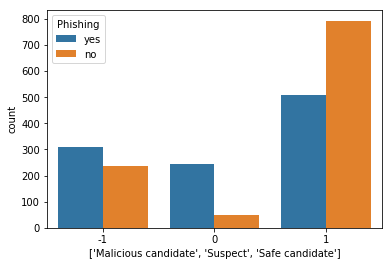

In [295]:
sns.countplot(x='embedded_domain_in_path',data= data, hue = 'Phishing')
plt.xlabel(['Malicious candidate', 'Suspect', 'Safe candidate'])

In [296]:
# Status: Included for model

In [297]:
data['ip_address'].value_counts()

-1    2134
 1       8
Name: ip_address, dtype: int64

In [298]:
# Status: Drop it (No useful information can be obtained from this feature)

In [299]:
# Note: Check for the source and validity of dictionary word and targeted blank and ext url

In [300]:
data['targeted_brand'].groupby(data['Phishing']).value_counts()

Phishing  targeted_brand
no        -1                837
           1                243
yes       -1                747
           1                315
Name: targeted_brand, dtype: int64

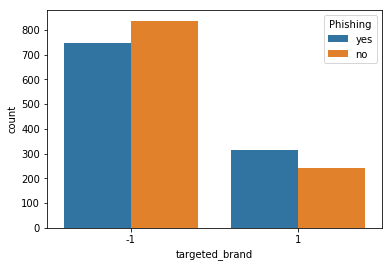

In [301]:
sns.countplot(x="targeted_brand",hue="Phishing",data= data)

In [302]:
data[pd.isnull(data['Subdomains'])]

,URL,embedded_domain_in_path,ip_address,dictionary_word,targeted_brand,ext url,Phishing,Subdomains,Prefix-Suffix,Anchor Tag,Forms,SSL Expiry Date,SSL Cert Check,Alexa Ranking,URL Length,URL Shortened,Redirects User,URL has @ Symbol,URL has HTTPS


C:\Users\prabh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


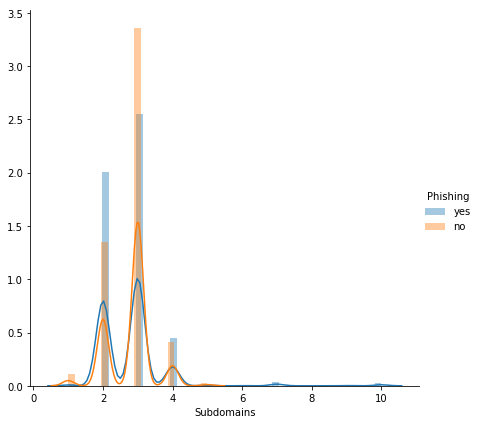

In [308]:
sns.FacetGrid(data, hue="Phishing", height=6).map(sns.distplot,"Subdomains").add_legend()

Observations: When the number of subdomains are more than 5, it is highly likely the site is malicious

In [309]:
#Status: Include it

In [312]:
numerical_features = []
numerical_features.append('Subdomains')

In [320]:
data['Prefix-Suffix'].groupby(data['Phishing']).value_counts()

Phishing  Prefix-Suffix
no         1               1039
          -1                 41
yes        1                844
          -1                218
Name: Prefix-Suffix, dtype: int64

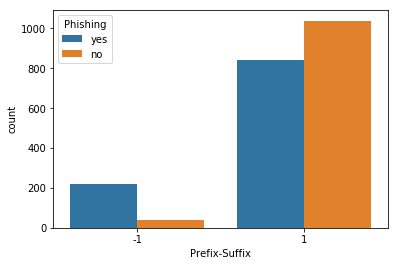

In [323]:
sns.countplot(x= 'Prefix-Suffix',data= data, hue='Phishing')

In [325]:
#Status include it  (most of the malicious candidates are correctly attributes)

In [332]:
data['Anchor Tag'].describe()

count    2142.000000
mean      215.224090
std        90.402299
min         1.000000
25%       150.000000
50%       209.000000
75%       300.000000
max       300.000000
Name: Anchor Tag, dtype: float64

In [333]:
data['Anchor Tag'].groupby(data['Phishing']).describe()

,count,mean,std,min,25%,50%,75%,max
Phishing,,,,,,,,
no,1080.0,162.807407,65.450715,1.0,150.0,179.5,200.0,300.0
yes,1062.0,268.529190,80.586660,1.0,300.0,300.0,300.0,300.0


In [334]:
numerical_features.append('Anchor Tag')

C:\Users\prabh\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\prabh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


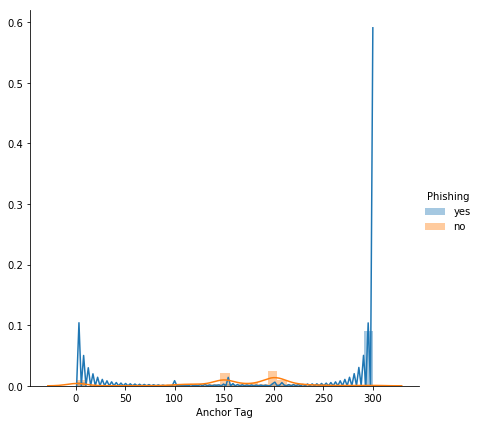

In [340]:
sns.FacetGrid(data, hue="Phishing", size=6).map(sns.distplot,'Anchor Tag').add_legend()

Observation: As Anchor tag feature reach higher values the site tends to be Phishing

In [342]:
#Status:  Definitely Include (seams to be important feature upon initial analysis)

In [346]:
data['Forms'].value_counts()

1    1092
0    1050
Name: Forms, dtype: int64

In [347]:
# 0: Data about forms not fetched
# 1: Data about forms fetched

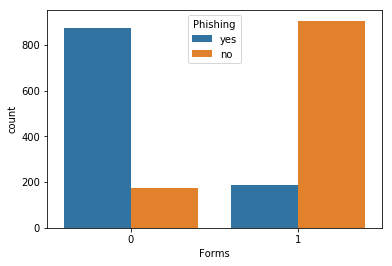

In [349]:
sns.countplot(x="Forms", hue="Phishing", data=data)

GREAT FEATURE!
Most of the safe candidates and malicious candidates are classified correctly

In [350]:
# Status: Definitely Include (Important parameter)

In [353]:
data['SSL Expiry Date'].groupby(data['Phishing']).describe()

,count,mean,std,min,25%,50%,75%,max
Phishing,,,,,,,,
no,1080.0,260.979630,209.460606,8.0,92.75,249.0,326.00,2501.0
yes,1062.0,185.770245,610.484474,11.0,69.00,69.0,84.75,9803.0


Mean Expiry Date for Phishing websites is slightly lower than that of safe websites. However, it would be too agressive to draw conclusions.

C:\Users\prabh\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\prabh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


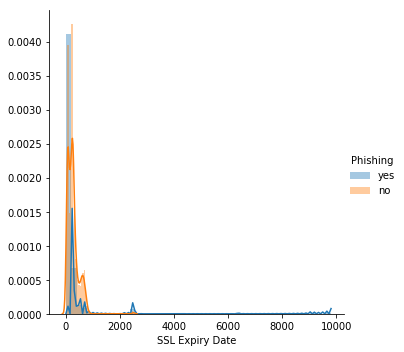

In [360]:
sns.FacetGrid(data=data, hue="Phishing", size=5).map(sns.distplot,'SSL Expiry Date').add_legend()

High Overlapping can be seen except the highly skewed values

In [361]:
# Status : Let's keep it 

In [362]:
numerical_features.append('SSL Expiry Date')

In [365]:
data['SSL Cert Check'].value_counts()

 0    1226
-1     704
 1     212
Name: SSL Cert Check, dtype: int64

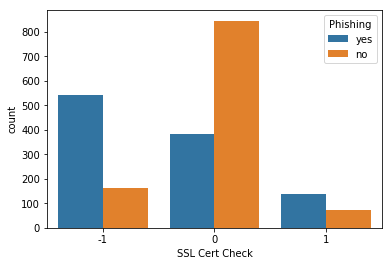

In [366]:
sns.countplot(x='SSL Cert Check', hue='Phishing', data=data)

In [367]:
#Status : Keep it

In [371]:
data['Alexa Ranking'].groupby(data['Phishing']).describe()

,count,mean,std,min,25%,50%,75%,max
Phishing,,,,,,,,
no,1080.0,6.350705e+05,2.290722e+06,1.0,599.5,7500.0,134548.0,19171314.0
yes,1062.0,1.526323e+06,3.687241e+06,1482.0,538000.0,538000.0,538000.0,19996840.0


C:\Users\prabh\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\prabh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


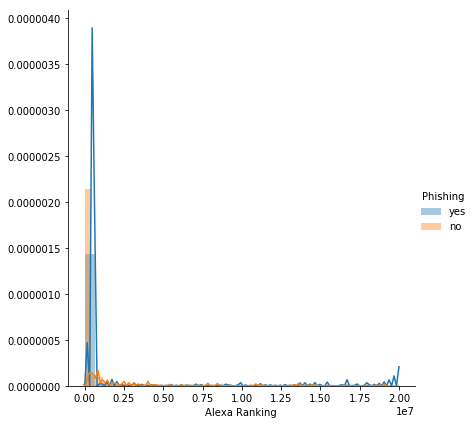

In [372]:
sns.FacetGrid(data, hue="Phishing", size=6).map(sns.distplot,'Alexa Ranking').add_legend()

In [376]:
numerical_features.append('Alexa Ranking')

In [377]:
#Status: keep it

In [381]:
numerical_features.append('URL Length')

In [384]:
data['URL Shortened'].value_counts()

-1    2009
 1     133
Name: URL Shortened, dtype: int64

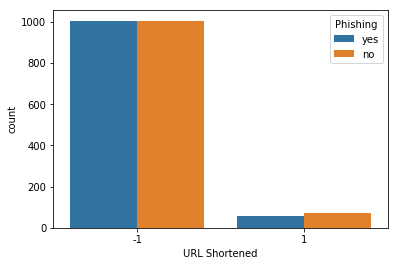

In [386]:
sns.countplot(x="URL Shortened", hue="Phishing", data= data)

In [388]:
# Not much information ; 

In [392]:
data['Redirects User'].value_counts()

 1    2126
-1      16
Name: Redirects User, dtype: int64

In [396]:
# Not enough distinction

In [397]:
data['URL has @ Symbol'].value_counts()

 1    2124
-1      18
Name: URL has @ Symbol, dtype: int64

In [398]:
# Not enough distinction

In [401]:
data['URL has HTTPS'].value_counts()

-1    1560
 1     582
Name: URL has HTTPS, dtype: int64

In [403]:
numerical_features

['Subdomains', 'Anchor Tag', 'SSL Expiry Date', 'Alexa Ranking', 'URL Length']

In [408]:
pairs = numerical_features

In [409]:
pairs.append('Phishing')

C:\Users\prabh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


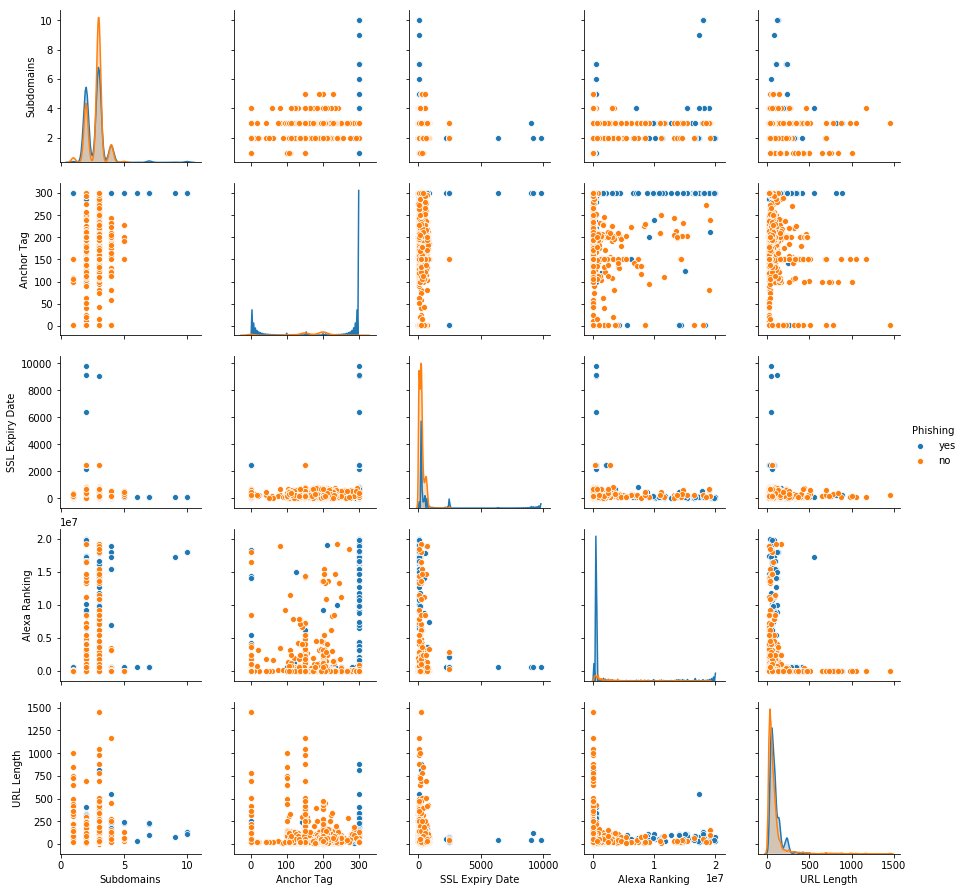

In [410]:
sns.pairplot(data[pairs],hue='Phishing')

In [415]:
numerical_features.remove("Phishing")

In [424]:
for col in numerical_features:
    data[col] = scale(data[col])

C:\Users\prabh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\prabh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\prabh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\prabh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\prabh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int

In [431]:
data.columns

Index(['URL', 'embedded_domain_in_path', 'ip_address', 'dictionary_word',
       'targeted_brand', 'ext url', 'Phishing', 'Subdomains', 'Prefix-Suffix',
       'Anchor Tag', 'Forms', 'SSL Expiry Date', 'SSL Cert Check',
       'Alexa Ranking', 'URL Length', 'URL Shortened', 'Redirects User',
       'URL has @ Symbol', 'URL has HTTPS'],
      dtype='object')

In [428]:
model = TSNE(n_components=2, random_state=0)

In [432]:
X = data.drop(['Phishing','URL'],axis=1)

In [435]:
data['Phishing'].replace('yes','1',inplace=True)

In [437]:
data['Phishing'].replace('no','0',inplace=True)

In [438]:
y = data['Phishing']

In [439]:
tsne_data = model.fit_transform(X)

In [440]:
tsne_data = np.vstack((tsne_data.T, y)).T

In [441]:
tsne_data

array([[-18.12958526611328, -27.14824676513672, '1'],
       [-45.64045715332031, -23.952043533325195, '0'],
       [22.156965255737305, 38.51922607421875, '1'],
       ...,
       [36.304779052734375, 20.637802124023438, '0'],
       [37.55514144897461, 21.1378173828125, '0'],
       [70.81363677978516, -1.3471229076385498, '1']], dtype=object)

In [444]:
len(tsne_data)

2142

In [445]:
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))
tsne_df.head()

,Dim_1,Dim_2,label
0,-18.1296,-27.1482,1
1,-45.6405,-23.952,0
2,22.157,38.5192,1
3,25.8022,19.3927,0
4,-14.8906,-4.23886,1


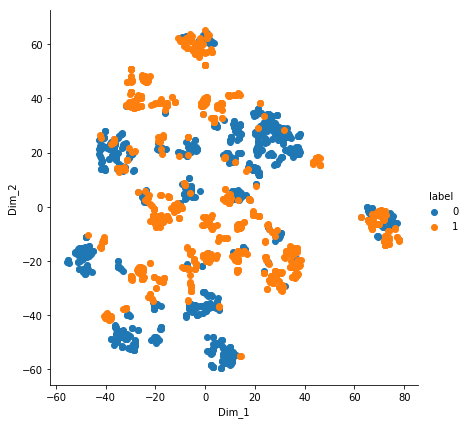

In [447]:
sns.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

# Observations

- T-SNE plot has made some well defined clusters
- Generally the central area is covered by label - 1 i.e. Phishing websites while, label-0 or safe website have some clusters around the edges
- Algorithms like K-NN might work wonders on this dataset ; Forest techniques and ensemble learning looks promising as well.
- Overfitting may ruin the model as this application of detecting malicious websites will observe so much unseen data once productionized

In [472]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [453]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [455]:
X_train.shape

(1499, 17)

In [452]:
neighbors = list(range(1,50,2))

In [457]:
cv_scores=[]
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, scoring='accuracy', cv=10)
    cv_scores.append(scores.mean())

CV_SCORES:  [0.9533670533505194, 0.9466601182274766, 0.9499713172437294, 0.9412776271537993, 0.9439310487873535, 0.9426066047379884, 0.9352818051172644, 0.9345973006207682, 0.9286015971080197, 0.9212412996133162, 0.9159299228113842, 0.9139254485384537, 0.909916381468806, 0.9065606767708194, 0.9045739218039319, 0.8965736254944664, 0.8959336266797043, 0.8972581299909625, 0.8972270471280204, 0.9012583077766421, 0.9059384565239936, 0.9046050639287673, 0.9059296265019187, 0.9019250337052018, 0.9019206186941642]


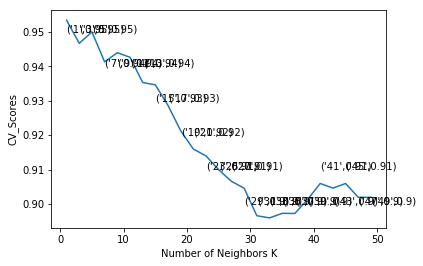

In [469]:
plt.plot(neighbors, cv_scores)
for xy in zip(neighbors,np.round(cv_scores,2)):
    plt.annotate("('%s',%s)"% xy, xy=xy, textcoords='data')
plt.xlabel('Number of Neighbors K')
plt.ylabel('CV_Scores')
print("CV_SCORES: ",cv_scores)

In [466]:
for xy in zip(neighbors,np.round(cv_scores,2)):
    print(xy)

(1, 0.95)
(3, 0.95)
(5, 0.95)
(7, 0.94)
(9, 0.94)
(11, 0.94)
(13, 0.94)
(15, 0.93)
(17, 0.93)
(19, 0.92)
(21, 0.92)
(23, 0.91)
(25, 0.91)
(27, 0.91)
(29, 0.9)
(31, 0.9)
(33, 0.9)
(35, 0.9)
(37, 0.9)
(39, 0.9)
(41, 0.91)
(43, 0.9)
(45, 0.91)
(47, 0.9)
(49, 0.9)


In [470]:
optimal_k = 5

In [473]:
# ============================== KNN with k = optimal_k ===============================================
# instantiate learning model k = optimal_k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k, algorithm='kd_tree')

# fitting the model
knn_optimal.fit(X_train, y_train)

# predict the response
pred = knn_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))


The accuracy of the knn classifier for k = 5 is 94.867807%


In [474]:
from sklearn.metrics import confusion_matrix

In [475]:
confusion_matrix(y_test,pred)

array([[321,  14],
       [ 19, 289]], dtype=int64)

In [518]:
conf_matrix = [[321, 14], [19, 289]]

In [544]:
conf_matrix = np.array(conf_matrix)

In [545]:
tn, fp, fn, tp = conf_matrix.ravel()
tpr = tp/(tp+fn)
tnr = tn/(tn+fp)
fpr = fp/(fp+tn)
fnr = fn/(fn+tp)

In [546]:
print(tpr*100)
print(tnr*100)
print(fpr*100)
print(fnr*100)
print("Precision:"+str(tp*100/(tp+fp)))
print("Recall:"+str(tpr*100))

93.83116883116884
95.82089552238806
4.179104477611941
6.1688311688311686
Precision:95.37953795379538
Recall:93.83116883116884


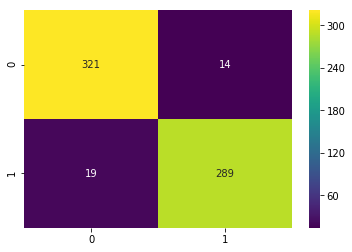

In [521]:
sns.heatmap(conf_matrix,annot=True, cmap='viridis', fmt='g')

Iteration 10 Complete [Time Taken For Last Iteration: 3.76 Seconds]
Iteration 20 Complete [Time Taken For Last Iteration: 3.81 Seconds]
Iteration 30 Complete [Time Taken For Last Iteration: 3.78 Seconds]
Iteration 40 Complete [Time Taken For Last Iteration: 4.05 Seconds]
Iteration 50 Complete [Time Taken For Last Iteration: 4.0 Seconds]
Iteration 60 Complete [Time Taken For Last Iteration: 3.98 Seconds]
Iteration 70 Complete [Time Taken For Last Iteration: 3.97 Seconds]
Iteration 80 Complete [Time Taken For Last Iteration: 3.85 Seconds]
Iteration 90 Complete [Time Taken For Last Iteration: 4.05 Seconds]
Iteration 100 Complete [Time Taken For Last Iteration: 3.98 Seconds]


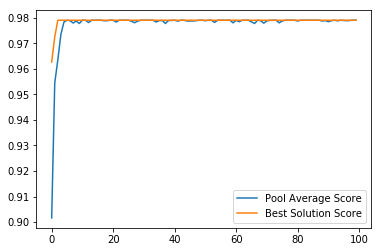

In [476]:
from geneticfs import GeneticFS

gen_model = KNeighborsClassifier(n_neighbors=optimal_k, algorithm='kd_tree')
gfs = GeneticFS()

# fit the optimizer
gfs.fit(model=gen_model, _type='classification', X=X, y=y) # classification model

# get results output
binary_output_of_optimal_variables, indicies_of_optimal_variables = gfs.results()

# plot results of progress
gfs.plot_progress()

In [477]:
binary_output_of_optimal_variables

array([0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0])

In [478]:
indicies_of_optimal_variables

[1, 2, 7, 8, 10, 11, 14]

In [496]:
X.columns[indicies_of_optimal_variables]

Index(['ip_address', 'dictionary_word', 'Anchor Tag', 'Forms',
       'SSL Cert Check', 'Alexa Ranking', 'Redirects User'],
      dtype='object')

In [498]:
reduced_X = X[X.columns[indicies_of_optimal_variables]]

In [501]:
rX_train, rX_test, ry_train, ry_test = train_test_split(reduced_X, y, test_size=0.3, random_state=0)

In [510]:
cv_scores=[]
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, rX_train, ry_train, scoring='accuracy', cv=10)
    print("K : %d, Score : %f" % (k, scores.mean()))
    cv_scores.append(scores.mean())

K : 1, Score : 0.976639
K : 3, Score : 0.967297
K : 5, Score : 0.961972
K : 7, Score : 0.964661
K : 9, Score : 0.954647
K : 11, Score : 0.950620
K : 13, Score : 0.946598
K : 15, Score : 0.935922
K : 17, Score : 0.929935
K : 19, Score : 0.926633
K : 21, Score : 0.921290
K : 23, Score : 0.922624
K : 25, Score : 0.923957
K : 27, Score : 0.921281
K : 29, Score : 0.921281
K : 31, Score : 0.913294
K : 33, Score : 0.912623
K : 35, Score : 0.913957
K : 37, Score : 0.913290
K : 39, Score : 0.915952
K : 41, Score : 0.915952
K : 43, Score : 0.911952
K : 45, Score : 0.911281
K : 47, Score : 0.911961
K : 49, Score : 0.913299


In [511]:
optimal_k = 3

In [512]:
# ============================== KNN with k = optimal_k ===============================================
# instantiate learning model k = optimal_k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k, algorithm='kd_tree')

# fitting the model
knn_optimal.fit(rX_train, ry_train)

# predict the response
pred = knn_optimal.predict(rX_test)

# evaluate accuracy
acc = accuracy_score(ry_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))


The accuracy of the knn classifier for k = 3 is 96.889580%


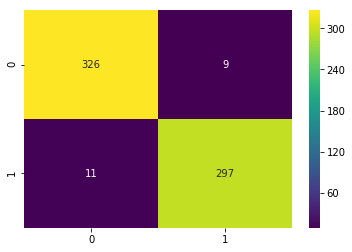

In [517]:
sns.heatmap(confusion_matrix(ry_test,pred), annot = True, cmap='viridis', fmt='g')

In [522]:
cnf_matrix = confusion_matrix(ry_test,pred)

In [531]:
tn, fp, fn, tp = cnf_matrix.ravel()
tpr = tp/(tp+fn)
tnr = tn/(tn+fp)
fpr = fp/(fp+tn)
fnr = fn/(fn+tp)

In [533]:
tpr*100

96.42857142857143

In [534]:
tnr*100

97.31343283582089

In [535]:
fpr*100

2.6865671641791042

In [536]:
fnr*100

3.571428571428571

In [539]:
print("Precision: "+ str(tp/(tp+fp)*100))

Precision: 97.05882352941177


In [540]:
print("Recall: "+ str(tpr*100))

Recall: 96.42857142857143
